In [353]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
from scipy.fft import ifft2, ifftshift, fftfreq
from scipy.integrate import quad_vec

In [365]:
l = 1
Nf = 0.01
λ = 10**(-8)
z = (l/2)**2/(λ*Nf)
N = 1000
lim = 4
fx = np.linspace(-lim, lim, N)
Δfx = fx[1]-fx[0]
fy = np.linspace(-lim, lim, N)
Δfy = fy[1]-fy[0]
Fx, Fy = np.meshgrid(fx, fy)

In [366]:
ρ = np.sqrt(Fx**2+Fy**2)
G = np.pi*(l/2)**2*2*sc.jv(1,2*np.pi*(l/2)*ρ)/(2*np.pi*(l/2)*ρ)
H = np.exp(1j*2*np.pi*z/λ)*np.exp(-1j*np.pi*λ*z*ρ**2)

In [367]:
x = ifftshift(fftfreq(N, Δfx))
y = ifftshift(fftfreq(N, Δfy))
X, Y = np.meshgrid(x, y)
Uf = ifftshift(ifft2(G*H))*Δfx*Δfy
If = abs(Uf)**2
I = If[int(N/2)]

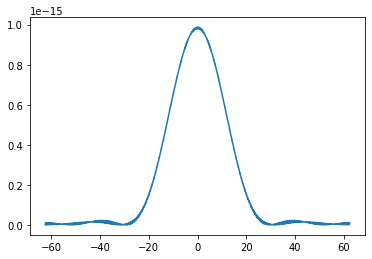

In [368]:
#plt.figure(figsize=(8,8))
#plt.pcolormesh(X, Y, If, shading='auto')
plt.plot(x, I)
plt.show()

In [369]:
x = np.delete(x,x==0)
Ifh = (np.pi*Nf*2*sc.jv(1,4*np.pi*Nf*x/l)/(4*np.pi*Nf*x/l))**2

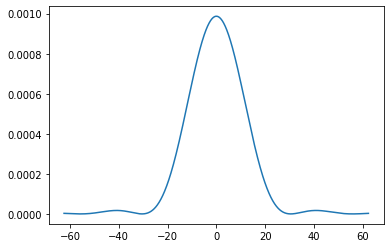

In [370]:
plt.plot(x, Ifh)
plt.show()

In [378]:
r = np.linspace(-60, 60, 1000)
f = lambda s: s*np.exp(1j*np.pi*s**2)*sc.jv(0,2*np.pi*r*s/np.sqrt(λ*z))
s0, s1 = 0, np.sqrt(Nf)

In [379]:
Uf, err = quad_vec(f, s0, s1)

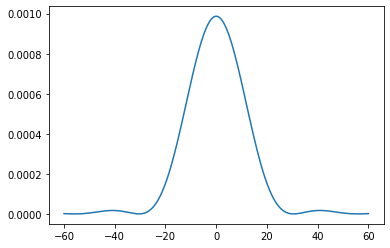

In [382]:
plt.plot(r, 4*np.pi**2*abs(Uf)**2)
plt.show()